# TEXT CLASSIFICATION AND SENTIMENT ANALYSIS

### Tasks
### Data Cleaning: 
Remove duplicates, handle missing reviews if any, preprocess text (lowercasing, stopwords removal).


In [1]:
import pandas as pd

# Load TSV file with header row
df = pd.read_csv('amazonreviews.tsv', sep='\t')

# Drop duplicate reviews and rows with missing labels or reviews
df = df.drop_duplicates()
df = df.dropna(subset=['label', 'review'])

print(f"Dataset shape after cleaning: {df.shape}")
print(df['label'].value_counts())


Dataset shape after cleaning: (10000, 2)
label
neg    5097
pos    4903
Name: count, dtype: int64


In [2]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [3]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()  # lowercase and ensure string type
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exploratory Analysis:
Word clouds, sentiment distribution, most common positive/negative words.

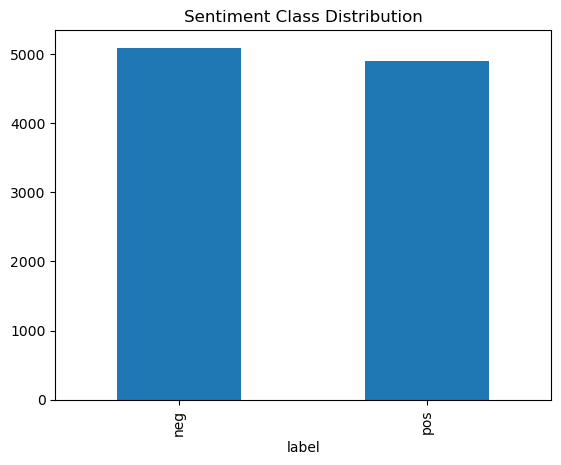

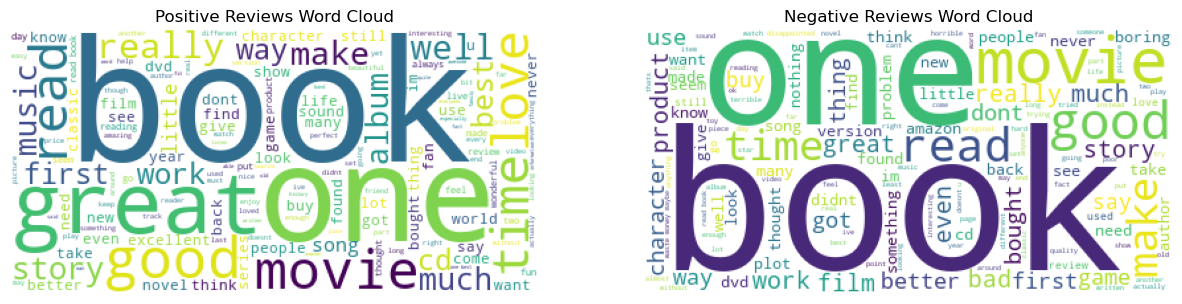

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plot class distribution
df['label'].value_counts().plot(kind='bar', title='Sentiment Class Distribution')
plt.show()

# Word cloud for positive reviews
pos_text = ' '.join(df[df['label'] == 'pos']['cleaned_review'])
wc_pos = WordCloud(background_color='white').generate(pos_text)

# Word cloud for negative reviews
neg_text = ' '.join(df[df['label'] == 'neg']['cleaned_review'])
wc_neg = WordCloud(background_color='white').generate(neg_text)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos)
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wc_neg)
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()


### Model Development:
Use NLP techniques (TF-IDF, Word2Vec, or BERT embeddings) with models like Logistic Regression, SVM, or Neural Networks.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])

# Encode labels to binary
y = df['label'].map({'pos': 1, 'neg': 0}).values

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


### Validation:
Use train/test split, cross-validation, and metrics like accuracy, F1-score.

In [6]:

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8455
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1037
           1       0.84      0.85      0.84       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



### Task
#### Train and evaluate Support Vector Machine (SVM) and Neural Network models for sentiment analysis on the preprocessed data, compare their performance with the previously trained Logistic Regression model using metrics like accuracy and classification reports, and summarize the findings to recommend the most suitable model.

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train SVM model
svm_model = SVC(kernel='linear', random_state=42) # Using a linear kernel for simplicity and often good performance on text data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Model Accuracy: {accuracy_svm:.4f}")
print("SVM Model Classification Report:")
print(report_svm)

SVM Model Accuracy: 0.8515
SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1037
           1       0.85      0.85      0.85       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print(f"Neural Network Model Accuracy: {accuracy_nn:.4f}")
print("Neural Network Model Classification Report:")
print(report_nn)

Neural Network Model Accuracy: 0.8220
Neural Network Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1037
           1       0.82      0.81      0.81       963

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred)

# Generate classification report for Logistic Regression
report_lr = classification_report(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy_lr:.4f}")
print("Logistic Regression Model Classification Report:")
print(report_lr)

Logistic Regression Model Accuracy: 0.8455
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1037
           1       0.84      0.85      0.84       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [12]:
import pandas as pd


accuracy_data = {
    'Model': ['Logistic Regression', 'SVM', 'Neural Network'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_nn]
}

accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.8455
1,SVM,0.8515
2,Neural Network,0.8220


In [13]:
print("\n--- Model Performance Summary ---\n")
print("Accuracy Scores:")
print(accuracy_df.to_string(index=False))

print("\n--- Logistic Regression Classification Report ---\n")
print(report_lr)

print("\n--- SVM Classification Report ---\n")
print(report_svm)

print("\n--- Neural Network Classification Report ---\n")
print(report_nn)


--- Model Performance Summary ---

Accuracy Scores:
              Model  Accuracy
Logistic Regression    0.8455
                SVM    0.8515
     Neural Network    0.8220

--- Logistic Regression Classification Report ---

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1037
           1       0.84      0.85      0.84       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


--- SVM Classification Report ---

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1037
           1       0.85      0.85      0.85       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


--- Neural Network Classification Report ---

              precision    recall  f1-

##### The Support Vector Machine (SVM) model is the most suitable for the given sentiment analysis task, as it demonstrated the highest accuracy among the evaluated models

#### 1.The Support Vector Machine (SVM) model achieved an accuracy of 0.8515. Its classification report showed precision, recall, and F1-scores of approximately 0.85 to 0.86 for both positive and negative sentiment classes.
#### 2.The Logistic Regression model performed closely with an accuracy of 0.8455. Its classification report indicated precision, recall, and F1-scores ranging from 0.84 to 0.86 for both classes.
#### 3.The Neural Network (MLPClassifier) model had the lowest performance, with an accuracy of 0.8220. Its classification report showed slightly lower precision, recall, and F1-scores, ranging from 0.81 to 0.83 for both classes.
### Overall, the SVM model exhibited the best performance, followed closely by Logistic Regression, while the simple Neural Network model underperformed compared to the other two